In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


### Ingredients
* Most used ingredient
* Number of ingredients

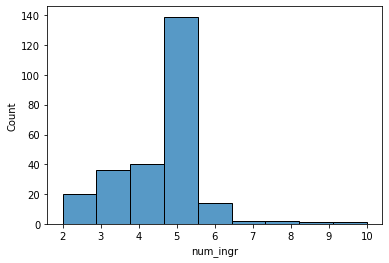

In [4]:
plt.figure()
sns.histplot(indian_food, x="num_ingr", bins =9)
plt.show()

### Diet

In [5]:
indian_food['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

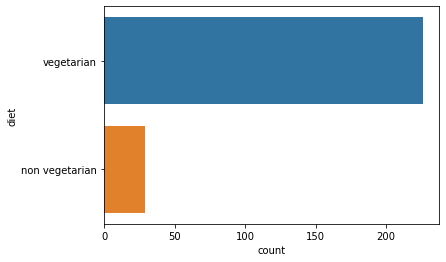

In [6]:
plt.figure()
sns.countplot(y='diet', data=indian_food, 
              order = indian_food['diet'].value_counts().index)
plt.show()

In [ ]:
def count_cat(size=None, ):
    plt.figure(size)
    sns.countplot()

### Flavor

In [7]:
indian_food['flavor_profile'].value_counts()

spicy     133
sweet      88
bitter      4
sour        1
Name: flavor_profile, dtype: int64

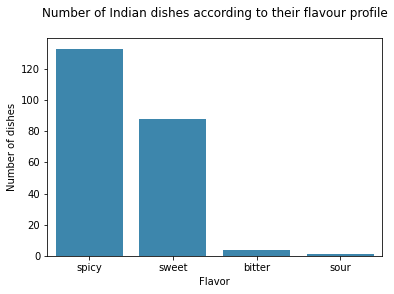

In [54]:
plt.figure()#figsize=(9,5)

sns.countplot(x='flavor_profile', data=indian_food, 
              order = indian_food['flavor_profile'].value_counts().index, color='#2b8cbe')

plt.title("Number of Indian dishes according to their flavour profile", fontsize=12, y=1.07) #, loc='left'
plt.xlabel("Flavor")
plt.ylabel("Number of dishes")

plt.show()

In [9]:
counts= indian_food['flavor_profile'].value_counts(normalize=True)
per_flav = counts.mul(100).rename('percent').reset_index()
per_flav

,index,percent
0,spicy,58.849558
1,sweet,38.938053
2,bitter,1.769912
3,sour,0.442478


(0.0, 60.0)

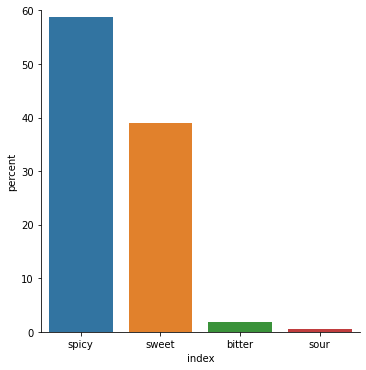

In [10]:
g = sns.catplot(x='index', y='percent', kind='bar', 
                data=per_flav)
g.ax.set_ylim(0,60)

In [11]:
def plotting_percentages(df, col):
    x= col
    
    # Temporary dataframe with percentage values
    temp_df = df[x].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent',kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

In [12]:
plotting_percentages(indian_food, 'flavor_profile')

TypeError: '<' not supported between instances of 'float' and 'str'

In [28]:
type(indian_food['flavor_profile'].iloc[104])
flavor_prof=[]
for prof in indian_food['flavor_profile']:
    if type(prof) != float:
       flavor_prof.append(prof)
    
dfflavor_profile = pd.DataFrame(flavor_prof, columns =['flavor_profile'])
#flavor_profile

In [29]:
def without_nan(column, name_column):
    """
    Crea una lista sin nan y la
    transforma a data frame
    
    column: the column of the df
    name_column: str nombre que recibe la columna
    """
    new_list = []
    for prof in column:
        if type(prof) != float:
            new_list.append(prof)
    
    return pd.DataFrame(new_list, columns =[name_column])

df_flavor = without_nan(indian_food['flavor_profile'], 'flavor_profile')
#df_flavor

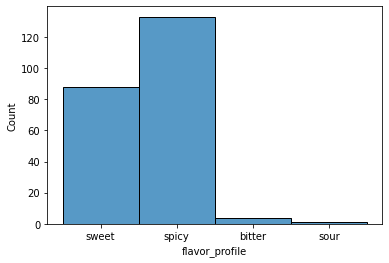

In [30]:
def plot_cat_var(column, name_column):
    plt.figure()
    sns.histplot(without_nan(column, name_column), x=name_column)
    return plt.show()

plot_cat_var(indian_food['flavor_profile'], 'flavor_profile')

### Course

In [31]:
indian_food['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

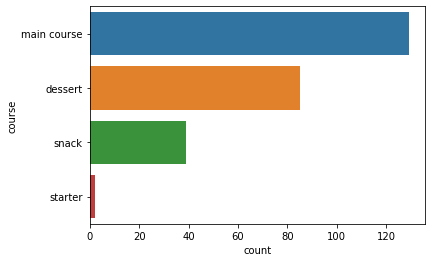

In [32]:
plt.figure()
sns.countplot(y="course", data=indian_food, 
              order = indian_food['course'].value_counts().index)
plt.show()

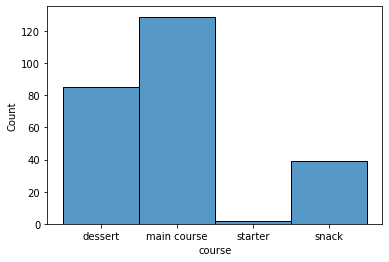

In [33]:
plt.figure()
sns.histplot(indian_food, x="course")
plt.show()

### State

In [34]:
indian_food['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Madhya Pradesh      2
Jammu & Kashmir     2
Uttarakhand         1
Haryana             1
Nagaland            1
Chhattisgarh        1
NCT of Delhi        1
Tripura             1
Name: state, dtype: int64

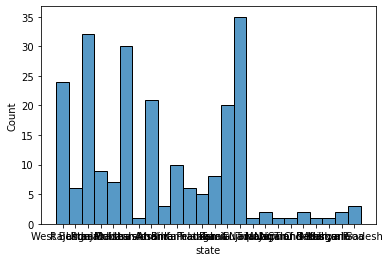

In [35]:
plot_cat_var(indian_food['state'], 'state')

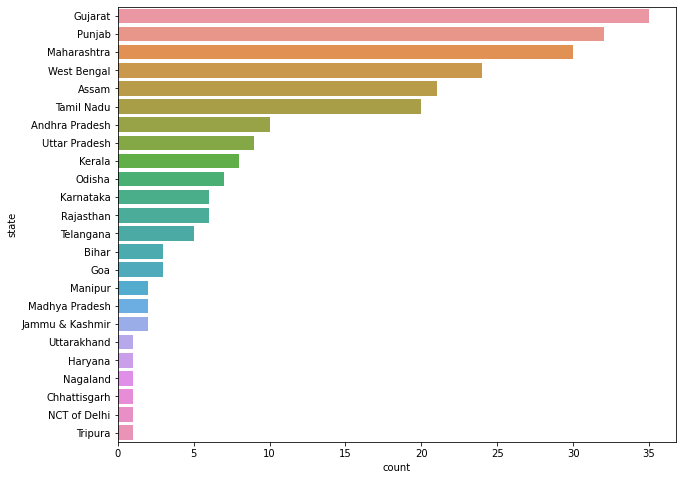

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(y="state", data=indian_food, 
              order = indian_food['state'].value_counts().index)
plt.show()

### Region

In [37]:
indian_food['region'].value_counts()

West          74
South         59
North         49
East          31
North East    25
Central        3
Name: region, dtype: int64

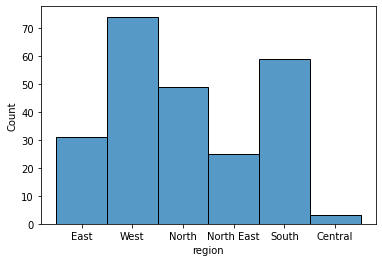

In [38]:
plot_cat_var(indian_food['region'], 'region')

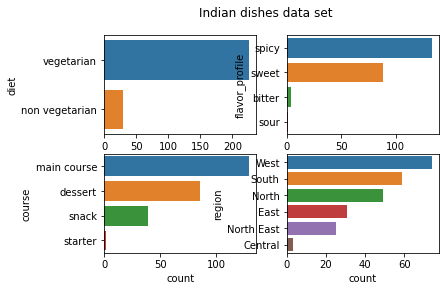

In [39]:
#fig, ax = plt.subplots(2, 2)
#fig.tight_layout()

#plot 2:
plt.subplot(2, 2, 1)
sns.countplot(y='diet', data=indian_food, 
              order = indian_food['diet'].value_counts().index)

#plot 3:
plt.subplot(2, 2, 2)
sns.countplot(y='flavor_profile', data=indian_food, 
              order = indian_food['flavor_profile'].value_counts().index)

#plot 4:
plt.subplot(2, 2, 3)
sns.countplot(y="course", data=indian_food, 
              order = indian_food['course'].value_counts().index)

#plot 5:
plt.subplot(2, 2, 4)
sns.countplot(y="region", data=indian_food, 
              order = indian_food['region'].value_counts().index)

plt.suptitle("Indian dishes data set")
plt.show()